# Natural Language Processing with Disaster Tweets

Twitter has become an important communication channel in times of emergency. With the help of modern technology people can express their feelings right away in any situation and reach to big amount of audience. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies). But, it’s not always clear whether a person’s words are actually announcing a disaster. For instance, 

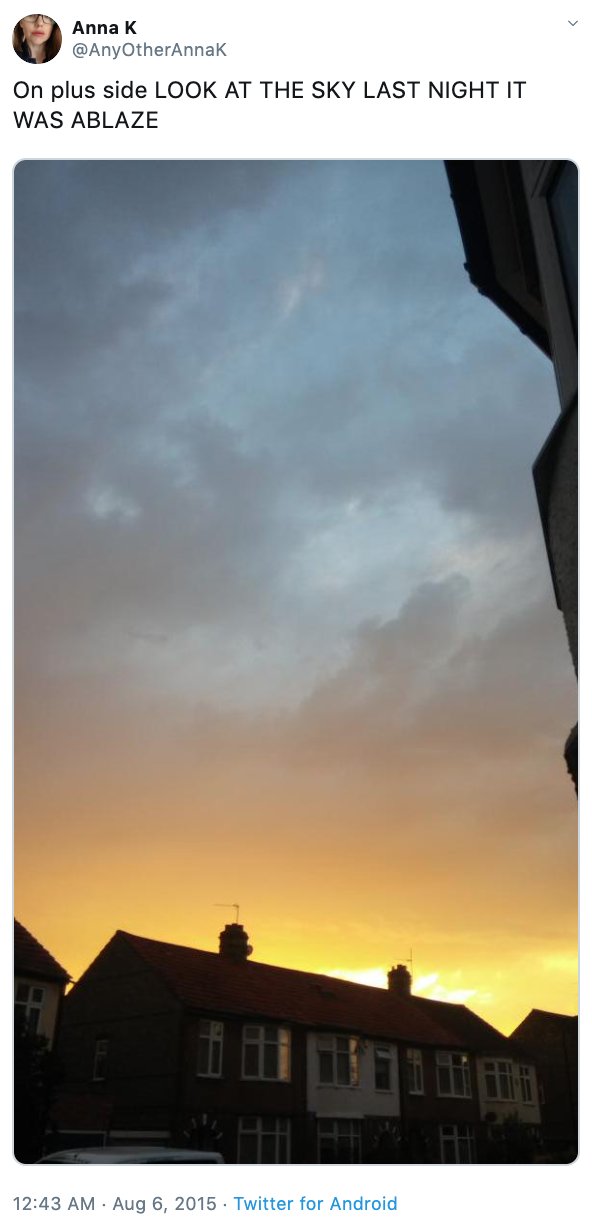

The author explicitly uses the word “ABLAZE” but means it metaphorically. This is clear to a human right away, especially with the visual aid. But it’s less clear to a machine.

I will try  to build a machine learning and deep learning models that predict which Tweets are about real disasters and which one’s aren’t.



In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Training set
train = pd.read_csv("train.csv")

In [ ]:
#Test set
test = pd.read_csv("test.csv")

In [ ]:
train[10:18]

,id,keyword,location,text,target
10,16,NaN,NaN,Three people died from the heat wave so far,1
11,17,NaN,NaN,Haha South Tampa is getting flooded hah- WAIT ...,1
12,18,NaN,NaN,#raining #flooding #Florida #TampaBay #Tampa 1...,1
13,19,NaN,NaN,#Flood in Bago Myanmar #We arrived Bago,1
14,20,NaN,NaN,Damage to school bus on 80 in multi car crash ...,1
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0


In [ ]:
train.shape

(7613, 5)

In [ ]:
test.tail(2)

,id,keyword,location,text
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


In [ ]:
test.shape

(3263, 4)

In [ ]:
#Creating copy of training dataset to use later
data = train.copy()
data.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


##Data Exploration

In [ ]:
#Checking duplicates and removing residuals
#print(len(train))
#train = train.drop_duplicates('text', keep='last')
#print(len(train))

From below figure we see how our target labels distributed. There is not distinctive difference between Disaster and Non-Disaster labeled texts, that is why we will not apply additional step for balancing them.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


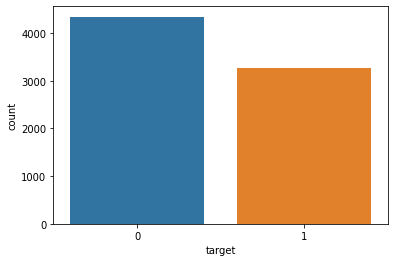

In [ ]:
#Checking label balance
sns.countplot(train['target'])

The below figure shows how much keywords within texts appear in Training and Test set. They are very crucial, because they help algorithm to understand the text is related with Disaster or Non-Disaster. Appearance of same word in both datasets help algorithm create connection and target labels properly.

Unique keywords num=222
Unique keywords num=222


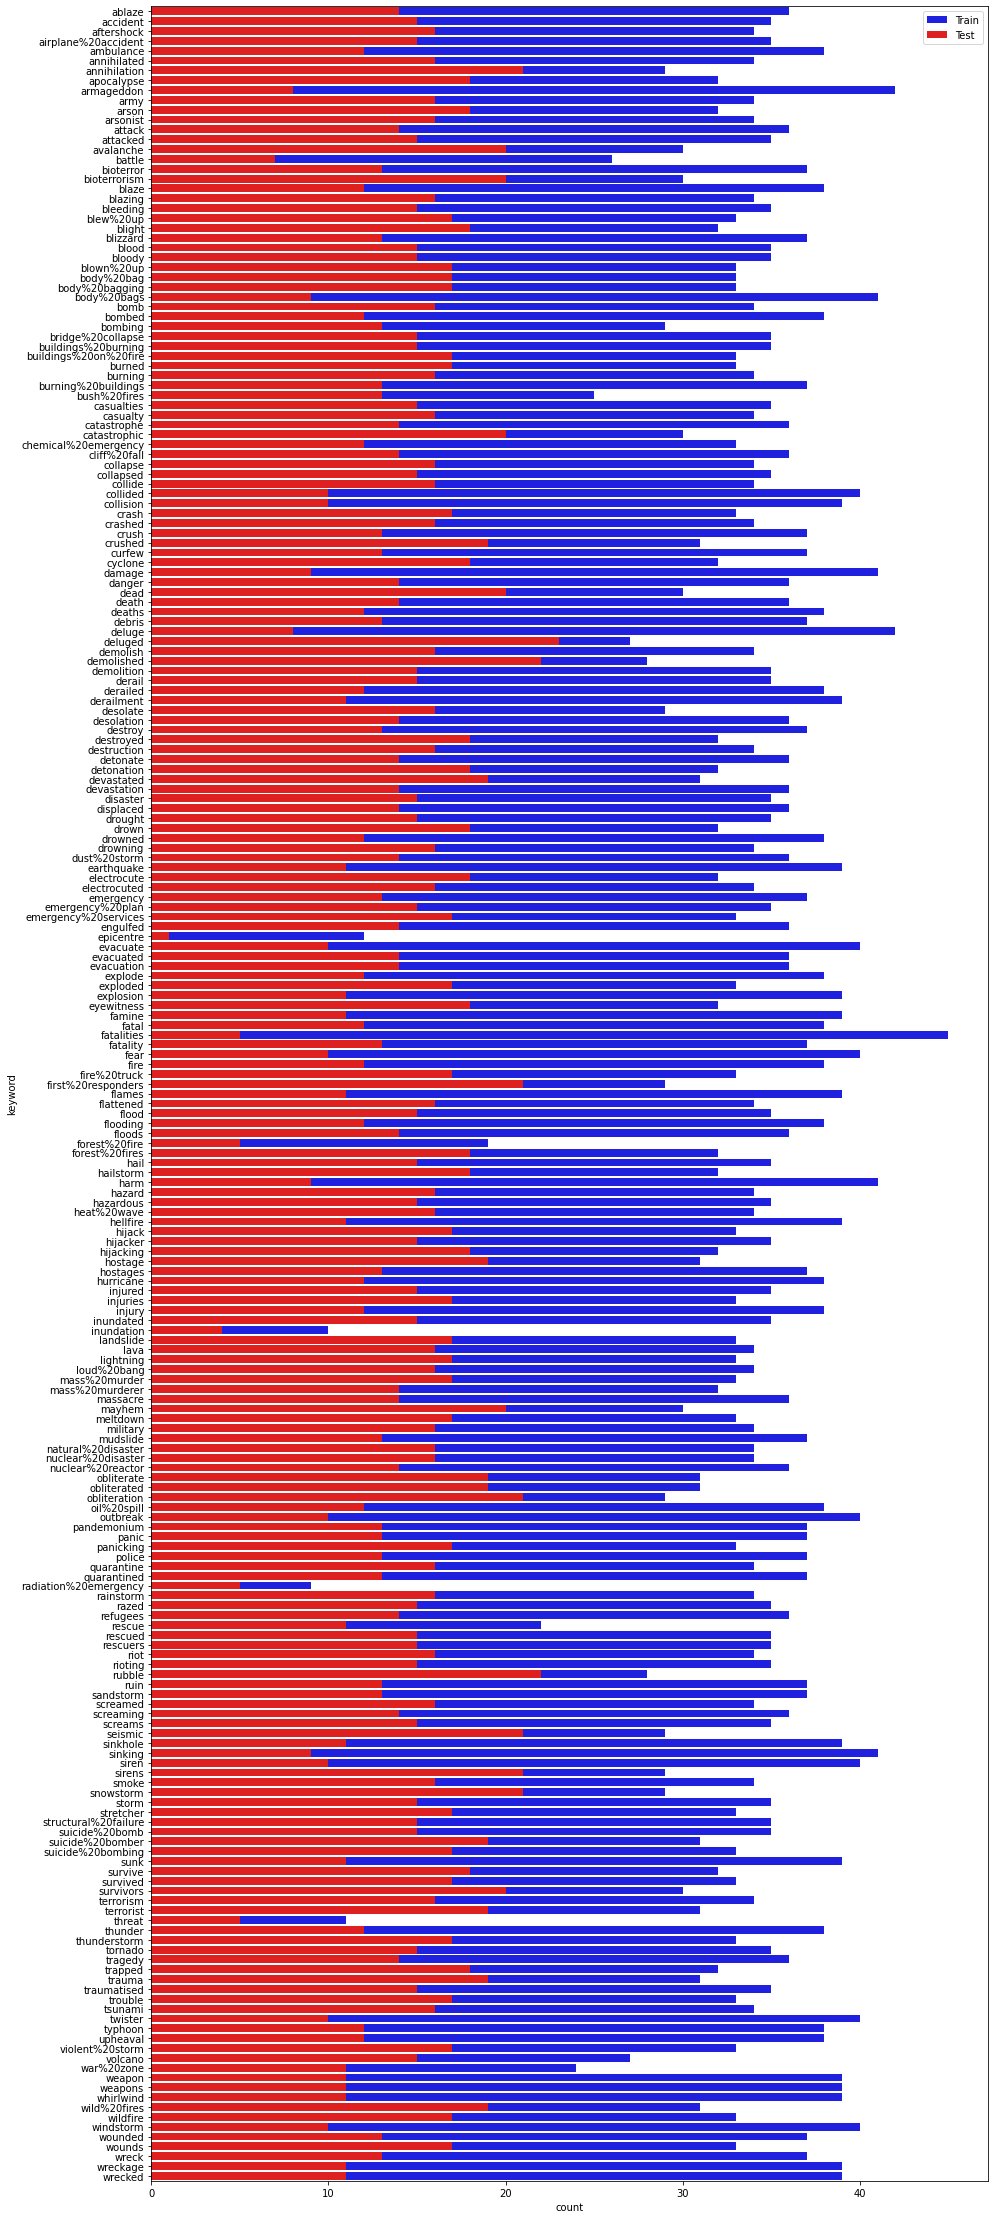

In [ ]:
#Appearance of keywords in training and test dataset 
plt.figure(figsize=(15,40))
print(f'Unique keywords num={len(train.keyword.unique())}')
print(f'Unique keywords num={len(test.keyword.unique())}')
sns.countplot(y=train['keyword'], color=(0,0,1), label='Train')
sns.countplot(y=test['keyword'], color=(1,0,0), label='Test')
plt.legend()

Checking if and how much same words appear in both Disaster and Non-Disaster labels is also very crucial to understand what is going on. Because those keywords describe some situation and as we said before people sometimes use word metaphorically and ironically. As you can see from below some keywords almost appear 50/50 in both labels sometimes and others even though not having same ration but again they appear in both. It creates problem for algorithm to detect text label properly.

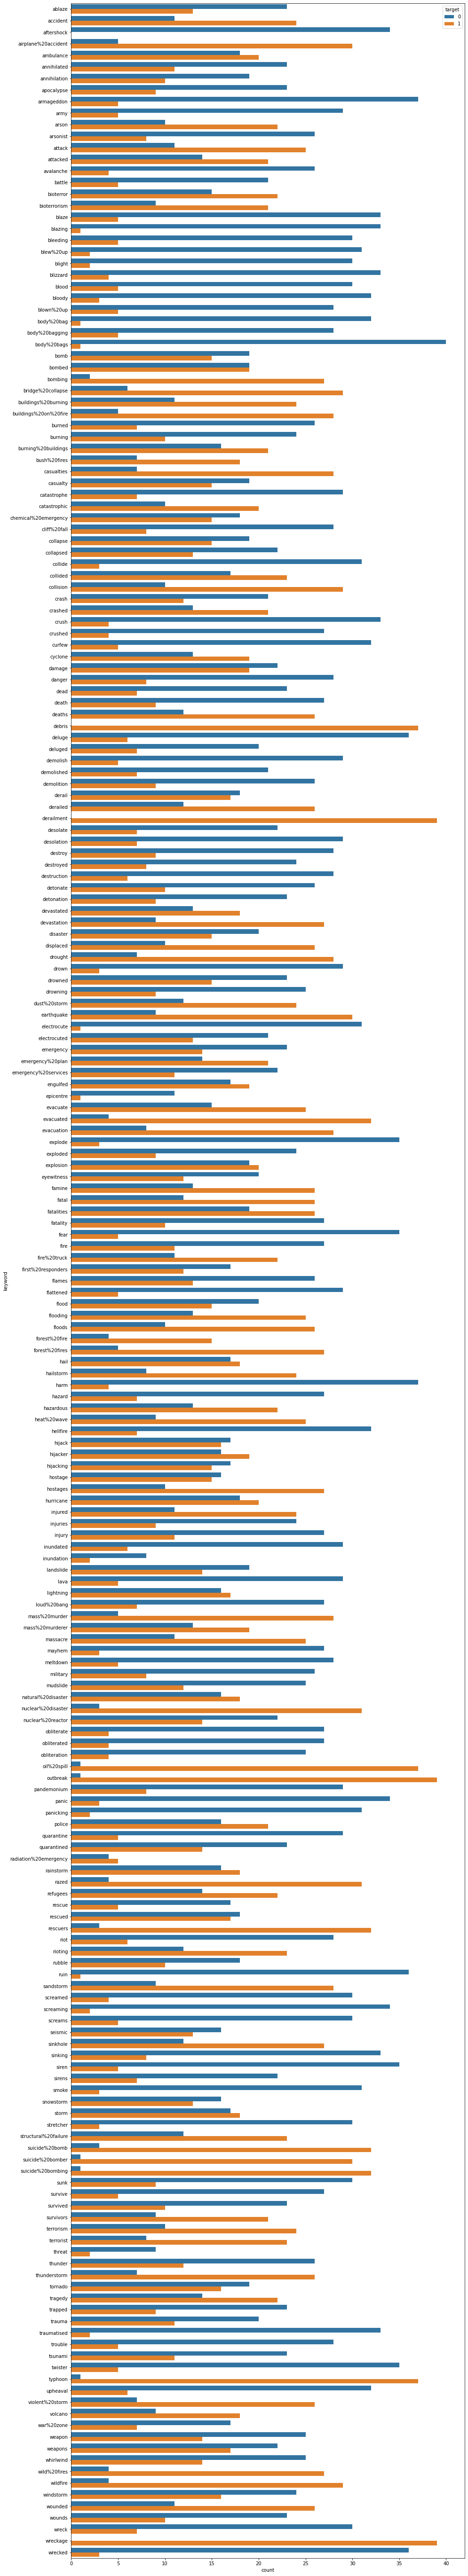

In [ ]:
#Appearance of words in label 0 and label 1
plt.figure(figsize=(15,100))
sns.countplot(data=train, y='keyword', hue='target')

Below I check number of Null values. I will not do further step for them, because I only need text and target columns which do not contain any null value.

In [ ]:
#Number of Null values in trainin set
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

### **Data Cleaning**

Below I remove special characters to make my dataset more readable for machine learning algorithms I use in both training and testing datasets.

In [ ]:
#Removing special characters by using Regular Expression library
import re

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [ ]:
pip install tweet-preprocessor

In [ ]:
import preprocessor as p

#Custom function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_texts(df):
    tempArr = []
    for line in df:
        # send to tweet_processor
        tmpL = p.clean(line)
        # remove puctuation
        tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
        tempArr.append(tmpL)
    return tempArr

In [ ]:
train["text"].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [ ]:
#Clean training data
train_text = clean_texts(train["text"])
train_text = pd.DataFrame(train_text)

In [ ]:
#Append cleaned tweets to the training data
train["clean_text"] = train_text

#Compare the cleaned and uncleaned tweets
train.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this may allah for...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive evacuation orders in california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby as smoke fr...


In [ ]:
#Clean the test data and append the cleaned tweets to the test data
test_text = clean_texts(test["text"])
test_text = pd.DataFrame(test_text)
#Append cleaned tweets to the training data
test["clean_text"] = test_text

#Compare the cleaned and uncleaned tweets
test.tail()

,id,keyword,location,text,clean_text
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fasteners...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm in ri worse than last hurricane my city&...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment in chicago
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issues hazardous weather outlook hwo
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...,has activated its municipal emergency plan


### **Creating Training and Test datasets**

I use train.csv data set for creating x_train and y_train and I use test.csv for creating y_train which I use for finding labels with ML algorithm and upload to Kaggle to check Accuracy which is defined as measure.

In [ ]:
x_train = train.clean_text

In [ ]:
x_train.head()

0    our deeds are the reason of this may allah for...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3       people receive evacuation orders in california
4    just got sent this photo from ruby as smoke fr...
Name: clean_text, dtype: object

In [ ]:
y_train = train.target

In [ ]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
x_test = test.clean_text

In [ ]:
x_test.head()

0                   just happened a terrible car crash
1    heard about is different cities stay safe ever...
2    there is a forest fire at spot pond geese are ...
3                                  apocalypse lighting
4           typhoon soudelor kills in china and taiwan
Name: clean_text, dtype: object

In [ ]:
x_test.shape

(3263,)

### **Vectorize tweets using CountVectorizer**

Machines cannot understand characters and words. So when dealing with text data we need to represent it in numbers to be understood by the machine. Countvectorizer is a method to convert text to numerical data for feeding our ML algortihms.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#Vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

#Learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))  

#Transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)  

In [ ]:
x_test_vec.shape

(3263, 16663)

## **Model Selection**

### **Support Vector Machines**

The objective of the Support Vector Machine algorithm is to find a hyperplane in an N-dimensional space (where N is the number of features) that distinctly
classifies the data points. To separate two classes of data point, there are many possible hyperplanes that can be chosen as it can be seen in the left-side graph of below figure. Our objective is to find a plane that has the maximum margin like in the right-side graph of the same Figure. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

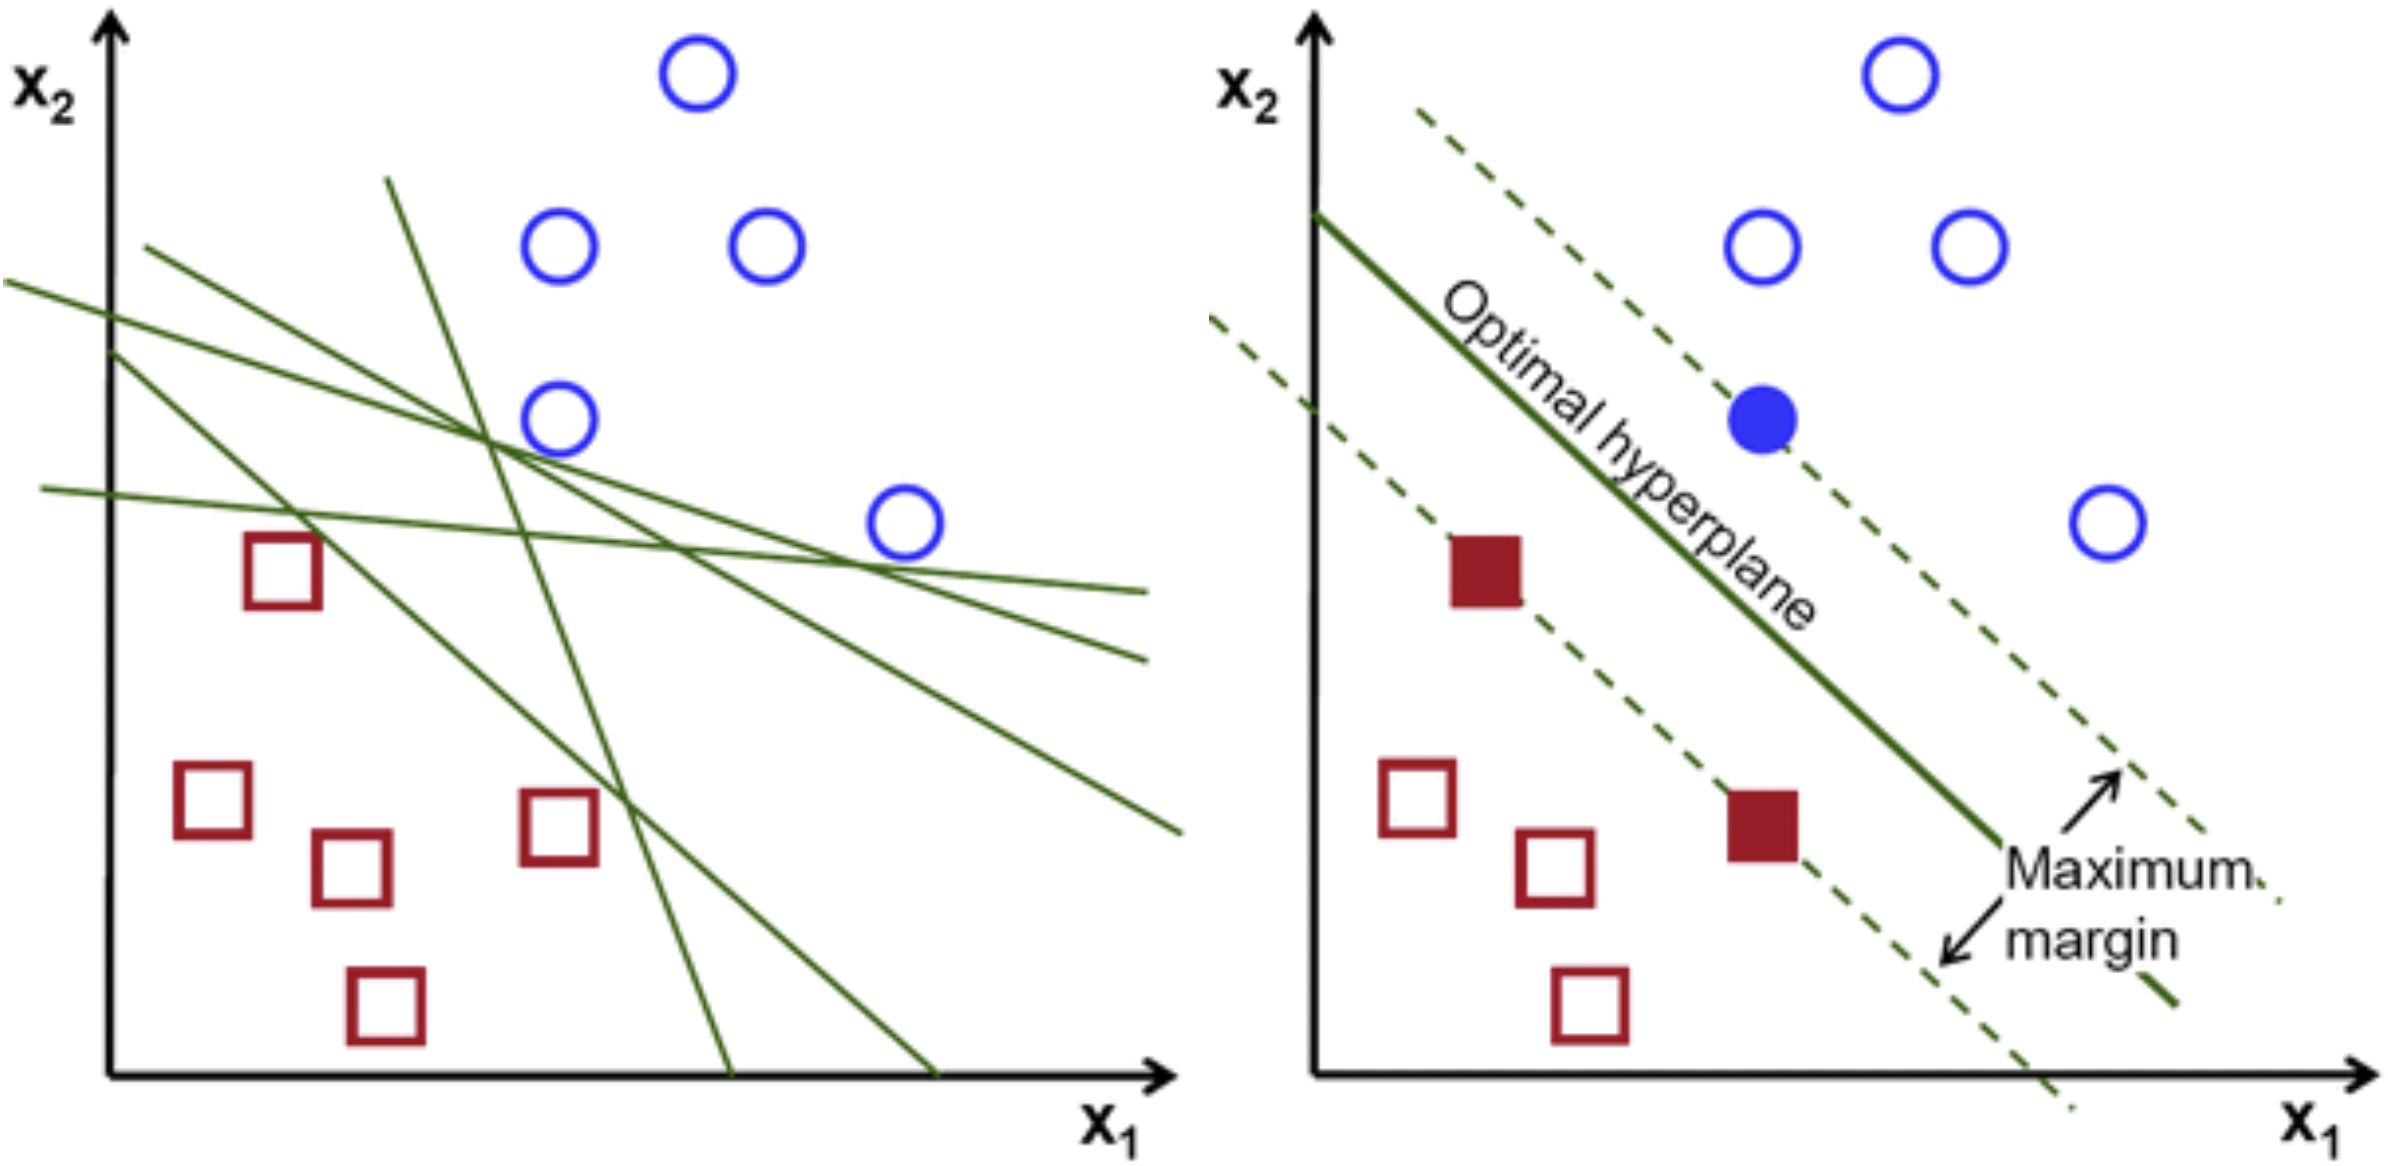

I have not played on any hyperparameter. They are all left as default and Kaggle competition score obtained from SVM is 0.78608 which is fairly good result with this processing.

In [ ]:
from sklearn import svm
#Classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

#Fit the SVC model based on the given training data
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

#Perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test_vec)

In [ ]:
test.head(2)

,id,keyword,location,text,clean_text
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about is different cities stay safe ever...


In [ ]:
test_copy = test.copy()

In [ ]:
test.drop(['keyword','location', "text", "clean_text"],axis=1,inplace=True)
test['y_pred_svm'] = y_pred_svm.tolist()
test.rename(columns = {'y_pred_svm':'target'}, inplace = True)

In [ ]:
test.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1


In [ ]:
#test.to_csv('y_pred_svm.csv', sep=',', index = False)

### **Logistic Regression**

Logistic Regression is a statistical learning technique as well as one of the simplest and most used Supervised Machine Learning algorithms for two-class classification based on probability, whose goal in its binary form is to train a classifier to make a binary decision about the class of a new input observation, that is, given a single input observation 𝑥, which can be represented by a feature vector [𝑥1, 𝑥2, ... , 𝑥𝑛] (with ‘𝑛’ number of features) and a target variable 𝑦 that can be 1 or 0, we want to know the probability P(𝑦 = 1|𝑥) that this observation is a member of class 1.


Also, in this model I have left all the hyperparameters default and got 0.78486. 

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0).fit(x_train_vec, y_train)
preds = logreg.predict(x_test_vec)

In [ ]:
preds[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
#Creating Final Submission dataset
test_copy.drop(['keyword','location', "text", "clean_text"],axis=1,inplace=True)
test_copy['y_pred_svm'] = y_pred_svm.tolist()
test_copy.rename(columns = {'y_pred_svm':'target'}, inplace = True)

In [ ]:
#test_copy.to_csv('preds.csv', sep=',', index = False)

### **Bert model with Deep Learning approach**

BERT (Bidirectional Encoder Representations from Transformers) is a recent document published by Google AI
Language researchers. It aroused interest in the Machine
Learning community by providing state-of-the-art findings in
a wide range of NLP practices, including Question Answering, Natural Language Inference (MNLI), and others. It utilizes Transformer, an attention mechanism that learns the contextual relationship between words (or subwords) in a text. In its original type, Transformer supports the following mechanisms — the encoder that reads the text input and the decoder that outputs a mission predictor. Since the aim of BERT is to generate a language model, only the encoder mechanism is required.

Let's install the transformers package from Hugging Face which will give us a pytorch interface for working with BERT.

In [ ]:
!pip install transformers   #It provides us pytorch interface for the BERT model 

     |████████████████████████████████| 4.0 MB 4.1 MB/s 
     |████████████████████████████████| 596 kB 75.2 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 6.6 MB 62.4 MB/s 
     |████████████████████████████████| 880 kB 62.3 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=838f5ecb3dbd42e7c98a72abc48b04d90528138e708cb9c37d8d0f687a08234a
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
import torch

#If there's a GPU available...
if torch.cuda.is_available():    

    #Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

#If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
data.drop(['keyword','location'],axis=1,inplace=True)
texts=data.text.values
targets = data.target.values

### Tokenization

To feed our text to BERT, it must be split into tokens, and then these tokens must be mapped to their index in the tokenizer vocabulary.

The tokenization must be performed by the tokenizer included with BERT--the below cell will download this for us. I use the "uncased" version here.

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Print the original text.
print(' Original: ', texts[25])

# Print the text split into tokens.
print('Tokenized: ', tokenizer.tokenize(texts[25]))

# Print the text mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts[25])))

 Original:  No way...I can't eat that shit
Tokenized:  ['no', 'way', '.', '.', '.', 'i', 'can', "'", 't', 'eat', 'that', 'shit']
Token IDs:  [2053, 2126, 1012, 1012, 1012, 1045, 2064, 1005, 1056, 4521, 2008, 4485]


###Texts to IDs

The tokenizer.encode function combines multiple steps for us:

Split the sentence into tokens

Add the special [CLS] and [SEP] tokens.

Map the tokens to their IDs.

Oddly, this function can perform truncating for us, but doesn't handle padding.

In [ ]:
#Tokenize all of the texts and map the tokens to thier word IDs.
input_ids = []

# For every text...
for text in texts:
    # `encode` will:
    #   (1) Tokenize the text.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        text,                      # Text to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                   )
    
    #Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

#Print sentence 0, now as a list of IDs.
print('Original: ', texts[1])
print('Token IDs:', input_ids[1])

Original:  Forest fire near La Ronge Sask. Canada
Token IDs: [101, 3224, 2543, 2379, 2474, 6902, 3351, 21871, 2243, 1012, 2710, 102]


In [ ]:
#It is needed to define max_len which will help us to avoid higher computational cost
print('Max sentence length: ', max([len(text) for text in input_ids]))

Max sentence length:  84


In [ ]:
#We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

#Set the maximum sequence length.
MAX_LEN = 90

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

#Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence, as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 90 values...

Padding token: "[PAD]", ID: 0

Done.


### Attention Masks

The attention mask simply makes it explicit which tokens are actual words versus which are padding.

The BERT vocabulary does not use the ID 0, so if a token ID is 0, then it's padding, and otherwise it's a real token.

In [ ]:
#Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    #Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    #Store the attention mask for this text.
    attention_masks.append(att_mask)

In [ ]:
data.shape

(7613, 3)

### Training & Validation Split

In [ ]:
#Use train_test_split to split our data into training and validation sets for training
from sklearn.model_selection import train_test_split

#Use 80% for training and 20% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, targets, 
                                                            random_state=1996, test_size=0.2)
#Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, targets,
                                             random_state=1996, test_size=0.2)

### Converting to PyTorch Data Types

Our model expects PyTorch tensors rather than numpy.ndarrays, so convert all of our dataset variables.

In [ ]:
#Convert all inputs and labels into torch tensors, the required datatype for our model.

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

I will also create an iterator for our dataset using the torch DataLoader class. This helps save on memory during training because, unlike a for loop, with an iterator the entire dataset does not need to be loaded into memory.

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#The DataLoader needs to know our batch size for training, so we specify it here.

batch_size = 16

#Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

#Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


### BertForSequenceClassification

I will be be using BertForSequenceClassification. This is the normal BERT model with an added single linear layer on top for classification that we will use as a sentence classifier. As we feed input data, the entire pre-trained BERT model and the additional untrained classification layer is trained on our specific task.

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

#Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

### Optimizer & Learning Rate Scheduler

Now that we have our model loaded we need to grab the training hyperparameters from within the stored model.

For the purposes of fine-tuning, I use further hyperparameters:

Batch size: 16.

Learning rate (Adam): 1e-5.

Number of epochs: 4.

The epsilon parameter eps = 1e-8 is "a very small number to prevent any division by zero in the implementation" 

In [ ]:
#Note: AdamW is a class from the huggingface library (as opposed to pytorch) 

optimizer = AdamW(model.parameters(),
                  lr = 1e-5, # args.learning_rate - default is 5e-5, our notebook had 1e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from transformers import get_linear_schedule_with_warmup

#Number of training epochs 
epochs = 4

#Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

#Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

### Training Loop

In [ ]:
#Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
#Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random

#This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


#Set the seed value all over the place to make this reproducible.
seed_val = 8111996

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

#Store the average loss after each epoch so we can plot them.
loss_values = []

#For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    #Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    #Measure how long the training epoch takes.
    t0 = time.time()

    #Reset the total loss for this epoch.
    total_loss = 0

    #Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    #For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        #Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            #Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            #Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        #Unpack this training batch from our dataloader. 
        #
        #As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        #Always clear any previously calculated gradients before performing a
        #backward pass. PyTorch doesn't do this automatically because 
        #accumulating the gradients is "convenient while training RNNs". 
        #(source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        #Perform a forward pass (evaluate the model on this training batch).
        #This will return the loss (rather than the model output) because we have provided the `labels`.
        #The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        #The call to `model` always returns a tuple, so we need to pull the loss value out of the tuple.
        loss = outputs[0]

        #Accumulate the training loss over all of the batches so that we can
        #calculate the average loss at the end. `loss` is a Tensor containing a
        #single value; the `.item()` function just returns the Python value from the tensor.
        total_loss += loss.item()

        #Perform a backward pass to calculate the gradients.
        loss.backward()

        #Clip the norm of the gradients to 1.0.
        #This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        #Update parameters and take a step using the computed gradient.
        #The optimizer dictates the "update rule"--how the parameters are
        #modified based on their gradients, the learning rate, etc.
        optimizer.step()

        #Update the learning rate.
        scheduler.step()

    #Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    #Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    381.    Elapsed: 0:00:10.
  Batch    80  of    381.    Elapsed: 0:00:20.
  Batch   120  of    381.    Elapsed: 0:00:30.
  Batch   160  of    381.    Elapsed: 0:00:39.
  Batch   200  of    381.    Elapsed: 0:00:49.
  Batch   240  of    381.    Elapsed: 0:00:59.
  Batch   280  of    381.    Elapsed: 0:01:09.
  Batch   320  of    381.    Elapsed: 0:01:20.
  Batch   360  of    381.    Elapsed: 0:01:30.

  Average training loss: 0.46
  Training epcoh took: 0:01:35

Running Validation...
  Accuracy: 0.84
  Validation took: 0:00:08

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    381.    Elapsed: 0:00:10.
  Batch    80  of    381.    Elapsed: 0:00:21.
  Batch   120  of    381.    Elapsed: 0:00:31.
  Batch   160  of    381.    Elapsed: 0:00:41.
  Batch   200  of    381.    Elapsed: 0:00:52.
  Batch   240  of    381.    Elapsed: 0:01:02.
  Batch   280  of    381.    Elapsed: 0:01:13.
  Batch   320  of    381.    Elap

Below Figure shows how Training loss over evolves all batches:

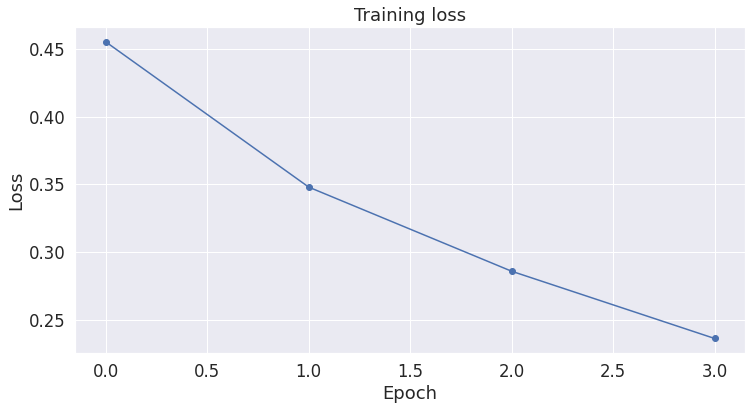

In [ ]:
% matplotlib inline

#Use plot styling from seaborn.
sns.set(style='darkgrid')

#Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

#Plot the learning curve.
plt.plot(loss_values, 'b-o')

#Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

### Performance on Test set

In [ ]:
testdf = pd.read_csv("test.csv")

In [ ]:
testdf.head(2)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."


In [ ]:
testdf.drop(['keyword','location'],axis=1,inplace=True)
texts=data.text.values

In [ ]:
testdf.tail(2)

,id,text
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,#CityofCalgary has activated its Municipal Eme...


In [ ]:
testdf.shape

(3263, 2)

In [ ]:
# Report the number of texts.
print('Number of test texts: {:,}\n'.format(testdf.shape[0]))

#Create text lists
texts = testdf.text.values

#Tokenize all of the texts and map the tokens to thier word IDs.
input_ids = []

#For every text...
for text in texts:
    # `encode` will:
    #   (1) Tokenize the text.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        text,                      # text to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)

# Set the batch size.  
batch_size = 16

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks) 
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test texts: 3,263



In [ ]:
# Prediction on test set

print('Predicting target labels for {:,} test texts...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch 
  
  # Telling the model not to compute or store gradients, saving memory and speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)
      

  logits = outputs[0]
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  #label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)

print('    DONE.')

Predicting target labels for 3,263 test texts...
    DONE.


In [ ]:
len(predictions)

204

In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

In [ ]:
flat_predictions.shape

(3263,)

In [ ]:
df = pd.DataFrame(data = flat_predictions)

In [ ]:
testdf['flat_predictions'] = flat_predictions.tolist()

In [ ]:
final_result = testdf.drop(['text'],axis=1,inplace=True)

In [ ]:
testdf[10:18]

,id,flat_predictions
10,30,0
11,35,0
12,42,0
13,43,0
14,45,0
15,46,1
16,47,0
17,51,1


In [ ]:
testdf.rename(columns = {'flat_predictions':'target'}, inplace = True)

In [ ]:
testdf.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


Text Classification with BERT in PyTorch gave us 0.82991 Accuracy in Kaggle competition which is higher than previous two ML methods. It is understandable because Bert is state-of-the-art model for NLP.


In [ ]:
from google.colab import files

#testdf.to_csv('output.csv', encoding = 'utf-8-sig', index = False) 
#files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

**At the end I can say that the results I obtained in Kaggle leaderboard are fairly good. All those scores obtained can be inreased by playing on hyperparameters for all of 3 methods, especially for Bert. I used 3 different Kaggle accounts to make submissions because, as it is known submissions are restricted by Kaggle and it prevents me do many submissions for score increase within reasonable amount of time. With different resources it can be easily developed further.**